In [1]:
import keras
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import pandas as pd
import os

list_classes = []

#listing all the image classes available , which are the names of the different folders containing images 

for root , dirs , files in os.walk(r'E:\Code\AnimalClassifierCNN\AnimalClassifier\images'):
    
    for folder in dirs:
        
        list_classes.append(folder)
        
print(list_classes)

#creating a dict assigning an individual number to each class 
class_dict = dict()

for i in range(len(list_classes)):
    
    class_dict[list_classes[i]] = i 


Using TensorFlow backend.


['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


In [4]:
import os
import glob
import cv2


#loading all the images in all the folders

def load_data(img_path , classes):
    
    x = []
    y = []
    
    for img_type in classes:
        
        path = os.path.join(img_path , img_type)
        
        for i in os.listdir(path):
            
            file_path = os.path.join(path , i)
            img = image.imread(file_path)
            img_resized = cv2.resize(img , (100,100))
            img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
            x.append(img_resized)
            y.append(class_dict[img_type])
            
    return x , y 



X , Y = load_data('images' , list_classes)


#print(X[0])

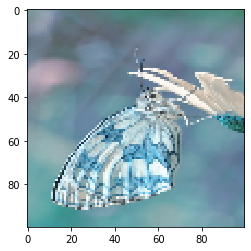

In [8]:
x_copy = X.copy()
y_copy = Y.copy()

plt.imshow(x_copy[0])
plt.show()

In [9]:
#one hot encoding of data

from keras.utils import to_categorical

x = np.array(x_copy)
x = (x * 255).astype(np.uint8)
y = np.array(y_copy)

y = to_categorical(y)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


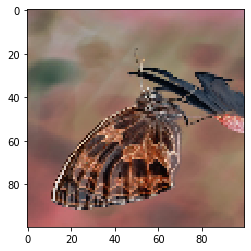

In [7]:
plt.imshow(x[0])
print(y[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


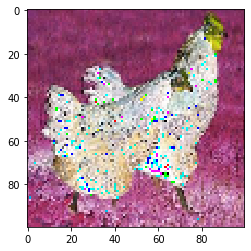

In [10]:
#test and train data split

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.33)

plt.imshow(x_train[0])
print(y_train[0])

In [8]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

#datagen.fit(x_train)

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D , Dense , Flatten , Dropout , MaxPooling2D , BatchNormalization , Activation

batch_size = 50

#defining the model

model = Sequential()
model.add(Conv2D(100, kernel_size = 10 ,strides = [2,2] , input_shape = ( 100 , 100 , 3) ,activation='relu'))
#model.add(MaxPooling2D(pool_size = [2,2]))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(100 , kernel_size = 5  , strides = [2,2] , activation='relu'))
#model.add(MaxPooling2D(pool_size = [2,2]))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(50 , kernel_size = 5  , strides = [2,2] , activation='relu'))
#model.add(MaxPooling2D(pool_size = [2,2]))
model.add(Dropout(0.3))
model.add(Conv2D(50 , kernel_size = 3 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv2D(256 , kernel_size = 3 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv2D(256 , kernel_size = 2 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(256 ))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3)) 
model.add(Dense(128))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3)) 
model.add(Dense(64))
#model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.3)) 
model.add(Dense(32))
#model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.3)) 
model.add(Dense(10 , activation = 'softmax'))

In [2]:
#defining the optimizer and tensorboard callback

from keras import optimizers
from datetime import datetime

optimizer = optimizers.SGD(lr = 0.1)

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [21]:
#compiling and fitting the model

model.compile(optimizer=optimizer , loss = 'categorical_crossentropy',
             metrics=['accuracy'])
train_history = model.fit(x_train , y_train , validation_data = (x_test , y_test),
epochs = 100 ,batch_size = batch_size , callbacks = [tensorboard_callback])

Train on 17539 samples, validate on 8640 samples
Epoch 1/100
17539/17539 [==============================] - 37s 2ms/step - loss: 2.0674 - acc: 0.2731 - val_loss: 2.0349 - val_acc: 0.2740
Epoch 2/100
17539/17539 [==============================] - 36s 2ms/step - loss: 2.0293 - acc: 0.2875 - val_loss: 2.1000 - val_acc: 0.2285
Epoch 3/100
17539/17539 [==============================] - 36s 2ms/step - loss: 1.9898 - acc: 0.3020 - val_loss: 1.9369 - val_acc: 0.3122
Epoch 4/100
17539/17539 [==============================] - 36s 2ms/step - loss: 1.9582 - acc: 0.3116 - val_loss: 2.1775 - val_acc: 0.2656
Epoch 5/100
17539/17539 [==============================] - 36s 2ms/step - loss: 1.9302 - acc: 0.3186 - val_loss: 1.8875 - val_acc: 0.3352
Epoch 6/100
17539/17539 [==============================] - 36s 2ms/step - loss: 1.9029 - acc: 0.3311 - val_loss: 1.9064 - val_acc: 0.3156
Epoch 7/100
17539/17539 [==============================] - 36s 2ms/step - loss: 1.8735 - acc: 0.3428 - val_loss: 1.9851 - v

In [30]:
#saving the model to a json file

model_json = model.to_json()

with open('model.json' , 'w') as json_file:
    
    json_file.write(model_json)

#saving serialized weights to model.h5

model.save_weights("model.h5")

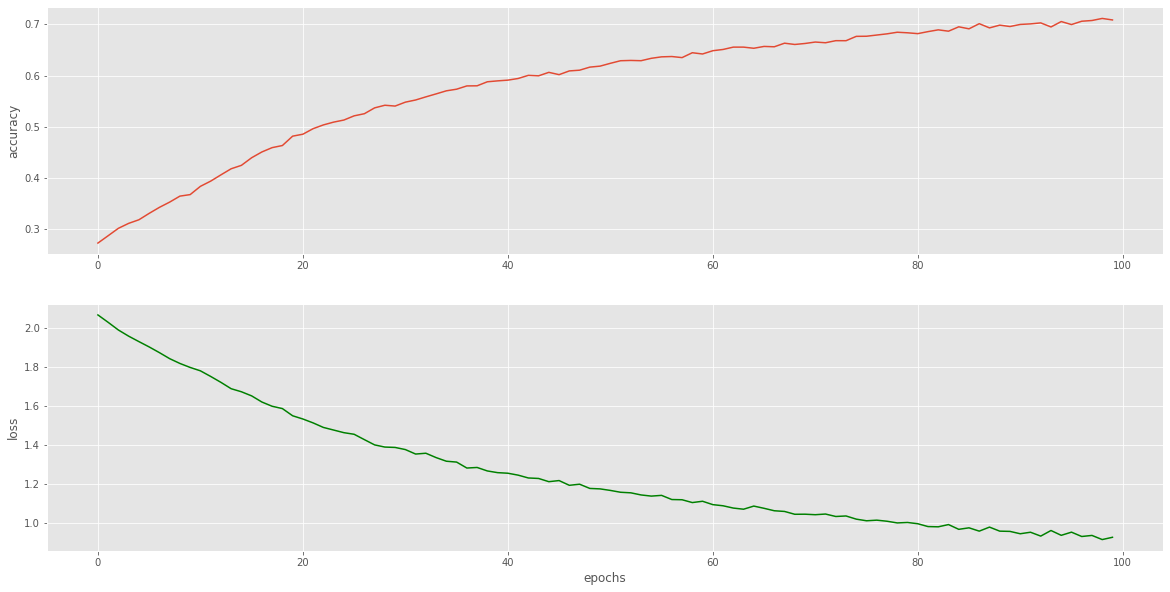

In [22]:
plt.style.use('ggplot')

fig , ax = plt.subplots(2,figsize=(20,10))

ax[0].plot(train_history.history['acc'])
ax[0].set_ylabel('accuracy')
ax[1].plot(train_history.history['loss'],'g')
ax[1].set_ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [24]:
#visualisation of the model using keras graphviz 

from keras.utils import plot_model

os.environ["PATH"] += os.pathsep + 'F:/Software/graphviz/bin/'

plot_model(model , to_file = 'model_diagram.jpeg' , show_shapes = True)

In [9]:
#function to get class name

def get_class_name(class_num):
    
    for c in class_dict.keys():
        
        if class_dict[c] == class_num:
            
            return c

In [10]:


def get_prediction(image_to_predict , model):
    
    prediction = model.predict(image_to_predict)[0]
    
    max_prob = 0
    max_index = 0
    
    for i in range(len(prediction)):
        
        if prediction[i] > max_prob:
            
            max_prob = prediction[i]
            max_index = i
            
    
    print("prediction is: {}".format(get_class_name(max_index)))
            
            
        

[[5.2302559e-03 2.9963010e-03 1.1015724e-03 1.7811578e-04 2.6964664e-03
  5.1255827e-04 3.9280904e-04 8.9942070e-04 9.8370337e-01 2.2891075e-03]] [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


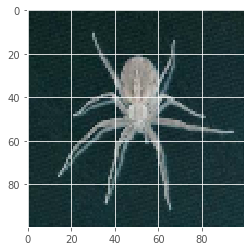

prediction is: spider


In [29]:

test_sample= x_test[1500]
test_sample = np.array([test_sample])

prediction = model.predict(test_sample)

print(prediction,y_test[1500])
plt.imshow(x_test[1500])
plt.show()

get_prediction(test_sample, model)



prediction is: spider


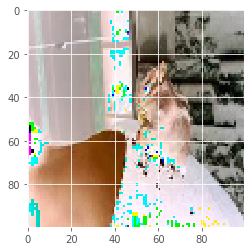

In [26]:
get_prediction(np.array([x_test[100]]) , model)

plt.imshow(x_test[100])

In [11]:
#loading the saved model 

json_file = open("model.json" , 'r')
data = json_file.read()
loaded_model = keras.models.model_from_json(data)
loaded_model.load_weights("model.h5")
loaded_model.compile(optimizer=optimizer , loss = 'categorical_crossentropy',
             metrics=['accuracy'])


W0416 12:45:05.158438 17492 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [3]:
#function to save model

def SaveModel(model:keras.models.Sequential()):
    
    model_json = model.to_json()

    with open('model.json' , 'w') as json_file:

        json_file.write(model_json)

    model.save_weights("model.h5")
    

def LoadModel(jsonfile:str , h5file:str):
    json_file = open(jsonfile , 'r')
    data = json_file.read()
    loaded_model = keras.models.model_from_json(data)
    loaded_model.load_weights(h5file)
    loaded_model.compile(optimizer=optimizer , loss = 'categorical_crossentropy',
                 metrics=['accuracy'])
    
    return loaded_model


W0418 15:03:35.007242  7564 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [27]:
# early stopping for 2nd training to prevent overfitting on train set

early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc' , mode='max')

In [12]:
#2nd training of the model on 15th of april 2020 after reaching 70% accuracy on 14th of april 2020

loaded_model.fit(x_train , y_train , validation_data = (x_test , y_test),
epochs = 100 ,batch_size = 50 , callbacks = [tensorboard_callback])

W0416 12:45:10.101171 17492 deprecation.py:323] From f:\program files (x86)\python\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 17539 samples, validate on 8640 samples


W0416 12:45:11.359454 17492 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0416 12:45:11.360454 17492 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/100
17539/17539 [==============================] - 39s 2ms/step - loss: 0.8464 - acc: 0.7465 - val_loss: 0.8778 - val_acc: 0.7316
Epoch 2/100
17539/17539 [==============================] - 35s 2ms/step - loss: 0.8315 - acc: 0.7488 - val_loss: 0.6554 - val_acc: 0.7966
Epoch 3/100
17539/17539 [==============================] - 36s 2ms/step - loss: 0.8269 - acc: 0.7487 - val_loss: 0.5328 - val_acc: 0.8309
Epoch 4/100
17539/17539 [==============================] - 36s 2ms/step - loss: 0.8186 - acc: 0.7482 - val_loss: 0.5667 - val_acc: 0.8251
Epoch 5/100
17539/17539 [==============================] - 36s 2ms/step - loss: 0.8120 - acc: 0.7500 - val_loss: 0.8691 - val_acc: 0.7509
Epoch 6/100
17539/17539 [==============================] - 36s 2ms/step - loss: 0.8074 - acc: 0.7554 - val_loss: 0.7511 - val_acc: 0.7706
Epoch 7/100
17539/17539 [==============================] - 36s 2ms/step - loss: 0.8000 - acc: 0.7554 - val_loss: 0.9623 - val_acc: 0.7019
Epoch 8/100
17539/17539 [=========

In [31]:
#3rd training session

loaded_model.fit(x_train , y_train , validation_data = (x_test , y_test),
epochs = 20 ,batch_size = 50 , callbacks = [tensorboard_callback])

Train on 17539 samples, validate on 8640 samples
Epoch 1/20
17539/17539 [==============================] - 36s 2ms/step - loss: 0.7388 - acc: 0.7736 - val_loss: 1.4748 - val_acc: 0.5933
Epoch 2/20
17539/17539 [==============================] - 36s 2ms/step - loss: 0.7497 - acc: 0.7733 - val_loss: 1.0410 - val_acc: 0.6765
Epoch 3/20
17539/17539 [==============================] - 36s 2ms/step - loss: 0.7468 - acc: 0.7713 - val_loss: 1.1279 - val_acc: 0.6788
Epoch 4/20
17539/17539 [==============================] - 36s 2ms/step - loss: 0.7391 - acc: 0.7750 - val_loss: 1.0794 - val_acc: 0.6866
Epoch 5/20
17539/17539 [==============================] - 36s 2ms/step - loss: 0.7323 - acc: 0.7770 - val_loss: 0.8495 - val_acc: 0.7330
Epoch 6/20
17539/17539 [==============================] - 36s 2ms/step - loss: 0.7217 - acc: 0.7831 - val_loss: 1.0503 - val_acc: 0.6941
Epoch 7/20
17539/17539 [==============================] - 36s 2ms/step - loss: 0.7381 - acc: 0.7760 - val_loss: 1.0233 - val_acc:

['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
prediction is: sheep
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


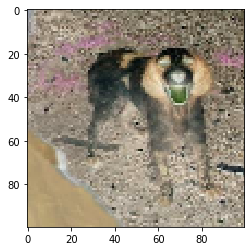

prediction is: butterfly
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


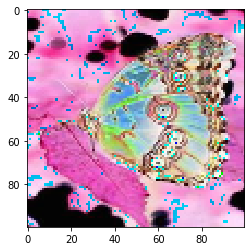

prediction is: sheep
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


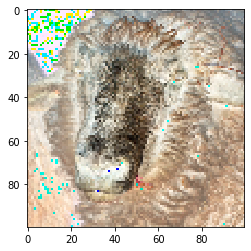

prediction is: cow
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


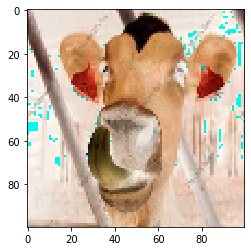

prediction is: sheep
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


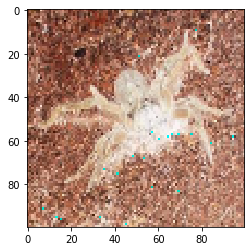

prediction is: butterfly
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


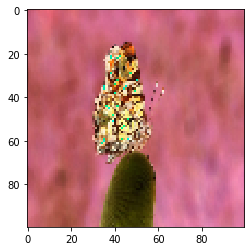

prediction is: horse
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


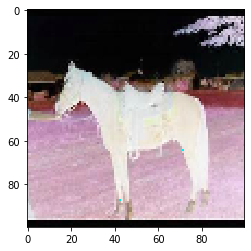

prediction is: chicken
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


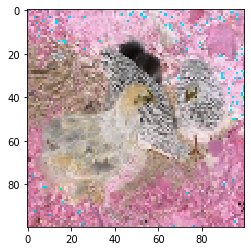

prediction is: spider
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


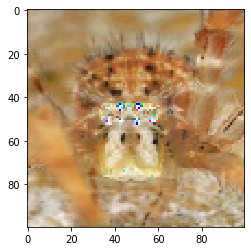

prediction is: sheep
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


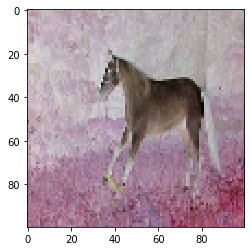

In [38]:
print(list_classes)

for i in range(10):
    
    get_prediction(np.array([x_test[i]]) , loaded_model)
    print(y_test[i])
    plt.imshow(x_test[i])
    plt.show()

In [4]:
loaded_model = LoadModel('model.json' , 'model.h5')


W0418 15:03:35.021246  7564 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0418 15:03:35.067257  7564 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0418 15:03:35.183282  7564 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0418 15:03:35.207287  7564 deprecation.py:506] From f:\program files (x86)\python\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instruc

In [5]:
loaded_model.save("model.h5")